In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("avocado.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
data.shape

(18249, 14)

In [4]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
data=data.drop('Unnamed: 0',axis=1)

In [7]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
data.rename(columns = {'Total Volume': 'Total_Volume',
                       '4046':'PLU4046',
                       '4225':'PLU4225',
                       '4770':'PLU4770',
                      'Total Bags':'Total_Bags',
                      'Small Bags':'Small_Bags',
                      'Large Bags':'Large_Bags',
                      'XLarge Bags':'XLarge_Bags'}, inplace = True)

data.head()

,Date,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


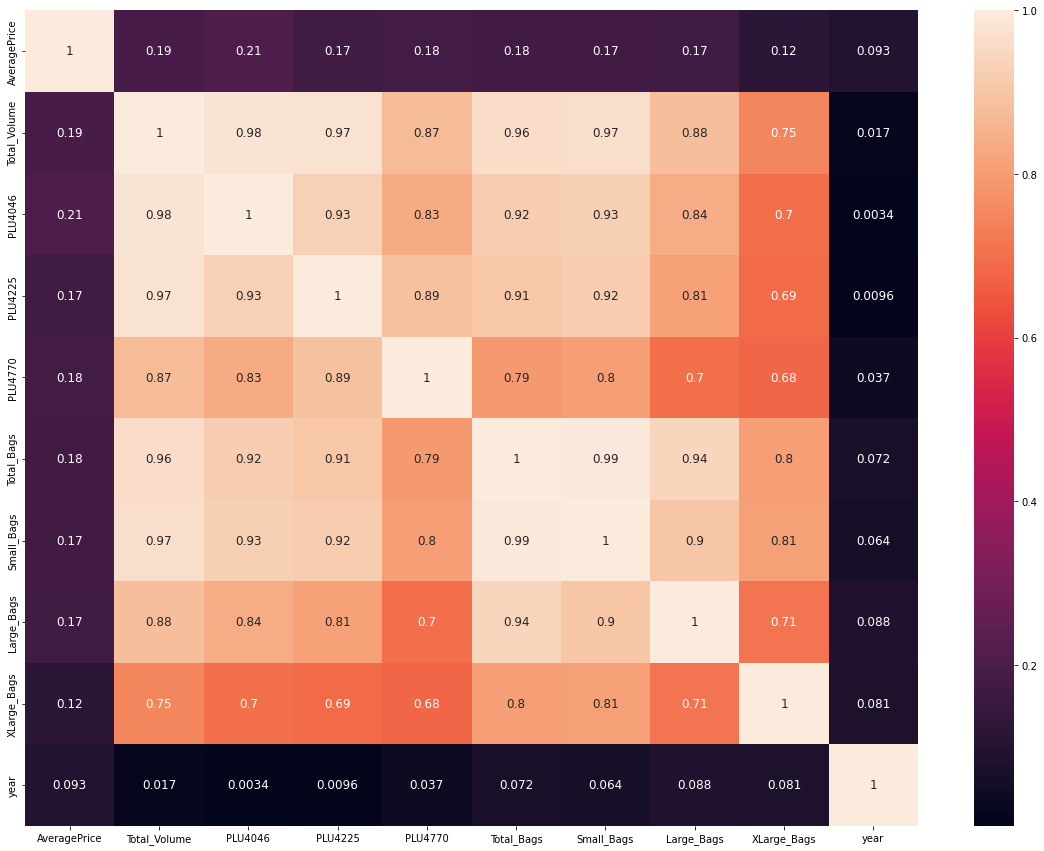

In [11]:
data_corr = data.corr().abs()

plt.figure(figsize = (20,15))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

In [12]:
data

,Date,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [13]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [14]:
data.head()

,Date,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total_Volume  18249 non-null  float64       
 3   PLU4046       18249 non-null  float64       
 4   PLU4225       18249 non-null  float64       
 5   PLU4770       18249 non-null  float64       
 6   Total_Bags    18249 non-null  float64       
 7   Small_Bags    18249 non-null  float64       
 8   Large_Bags    18249 non-null  float64       
 9   XLarge_Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

In [16]:
# will drop the date and regions features because month and days is there
data=data.drop(['Date','region'],axis=1)
data

,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,1,14


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   PLU4046       18249 non-null  float64
 3   PLU4225       18249 non-null  float64
 4   PLU4770       18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge_Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  Month         18249 non-null  int64  
 12  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 1.8+ MB


In [18]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

elements = data.select_dtypes(include=['object']).columns

elements

Index(['type'], dtype='object')

In [19]:
for i in elements:
    data[i] = enc.fit_transform(data[i])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   PLU4046       18249 non-null  float64
 3   PLU4225       18249 non-null  float64
 4   PLU4770       18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge_Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  Month         18249 non-null  int64  
 12  Day           18249 non-null  int64  
dtypes: float64(9), int32(1), int64(3)
memory usage: 1.7 MB


In [21]:
x = data.drop(['AveragePrice'], axis=1)
y = data['AveragePrice']

In [22]:
x.skew().sort_values(ascending = False)

XLarge_Bags     13.139751
PLU4770         10.159396
Large_Bags       9.796455
Total_Bags       9.756072
Small_Bags       9.540660
Total_Volume     9.007687
PLU4225          8.942466
PLU4046          8.648220
year             0.215339
Month            0.106617
Day              0.014310
type             0.000329
dtype: float64

In [23]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [24]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

XLarge_Bags     0.793520
year            0.213156
PLU4770         0.032184
Total_Volume    0.011171
Small_Bags      0.007058
type            0.000329
Total_Bags     -0.001626
PLU4225        -0.017740
PLU4046        -0.022679
Large_Bags     -0.073809
Month          -0.146584
Day            -0.208462
dtype: float64

In [25]:
x = pd.DataFrame(x_new, columns = x.columns)

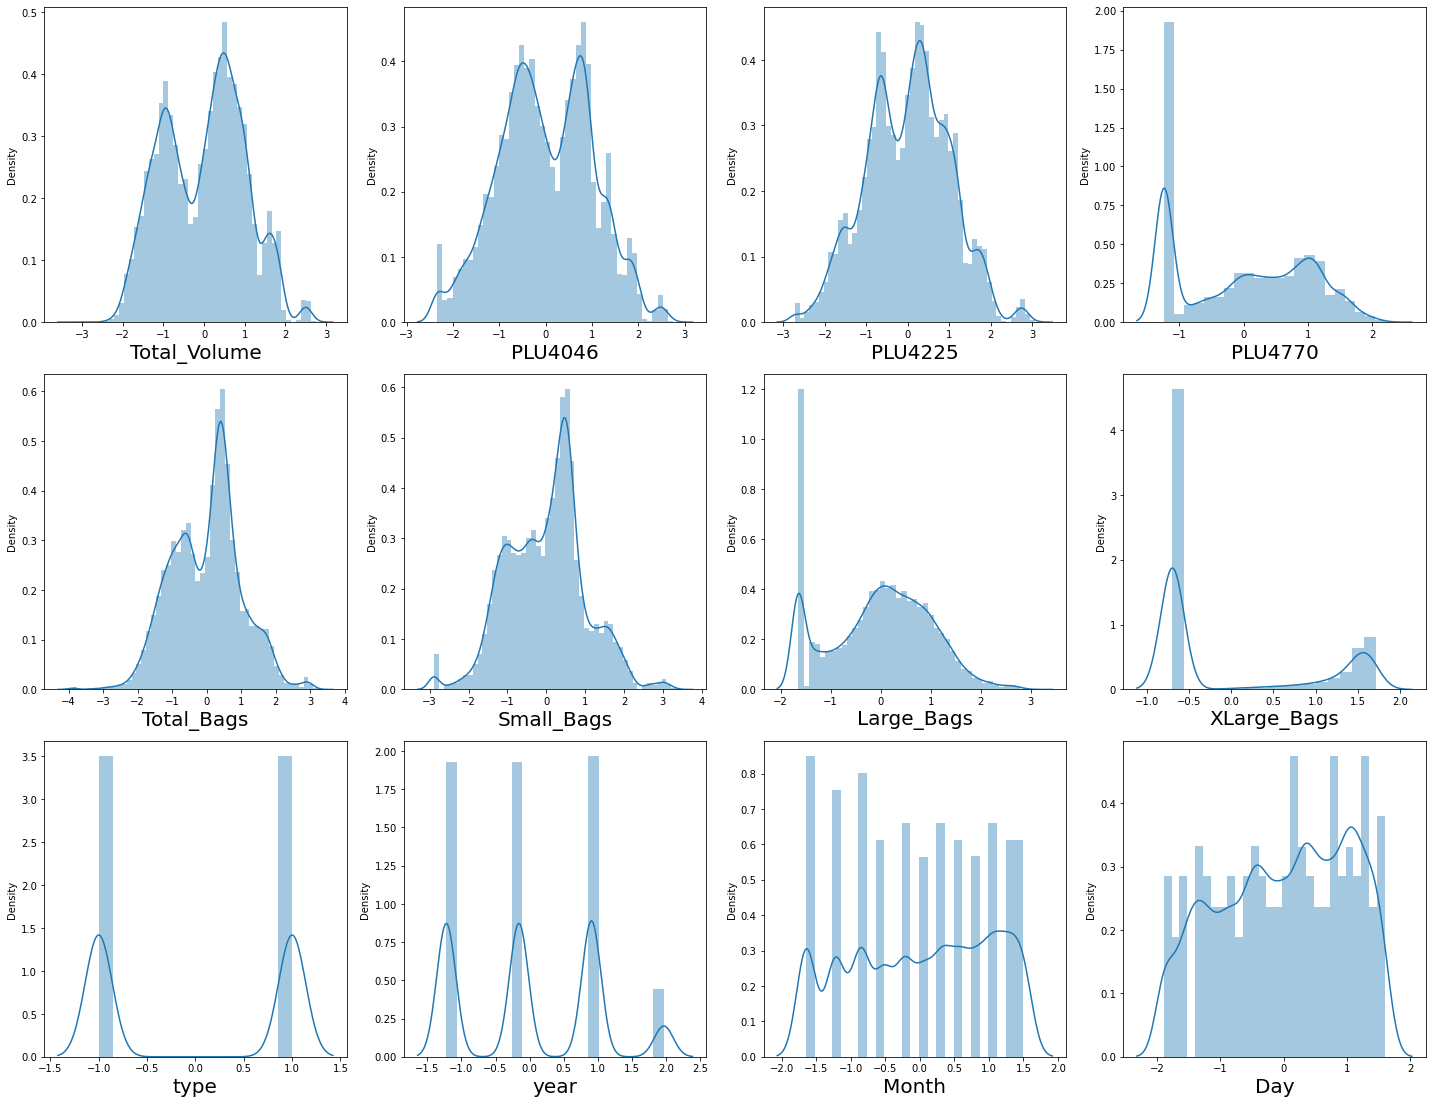

In [26]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

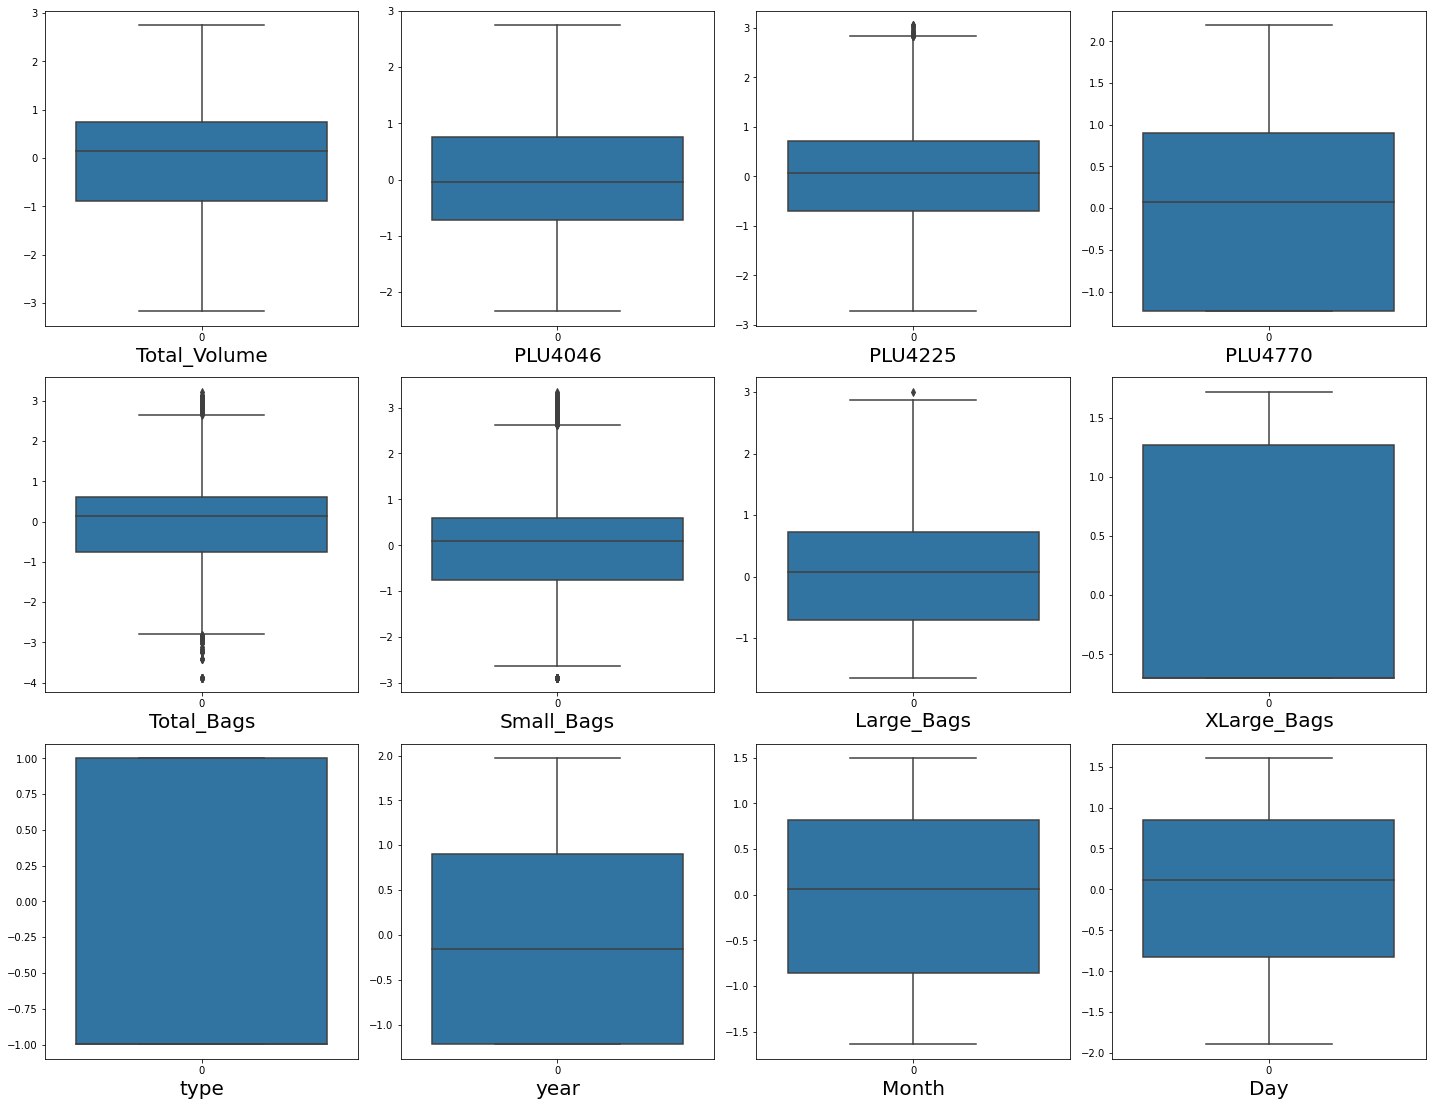

In [27]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(data=x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [28]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Total_Volume     True
PLU4046          True
PLU4225         False
PLU4770          True
Total_Bags      False
Small_Bags      False
Large_Bags      False
XLarge_Bags      True
type             True
year             True
Month            True
Day              True
dtype: bool
****************************************
Low Side Outliers Present
Total_Volume    False
PLU4046          True
PLU4225          True
PLU4770          True
Total_Bags      False
Small_Bags       True
Large_Bags       True
XLarge_Bags      True
type             True
year             True
Month            True
Day              True
dtype: bool


In [29]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [30]:
PLU4225_high = q3.PLU4225 + (1.5 * iqr.PLU4225)

# Check the Indexes which have higher values

index1 = np.where(x['PLU4225']> PLU4225_high)

x = x.drop(x['PLU4225'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(18221, 12)
(18221,)


In [31]:
Total_Bags_high = q3.Total_Bags + (1.5 * iqr.Total_Bags)

# Check the Indexes which have higher values

index1 = np.where(x['Total_Bags']> Total_Bags_high)

x = x.drop(x['Total_Bags'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(18121, 12)
(18121,)


In [32]:
Small_Bags_high = q3.Small_Bags + (1.5 * iqr.Small_Bags)

# Check the Indexes which have higher values

index1 = np.where(x['Small_Bags']> Small_Bags_high)

x = x.drop(x['Small_Bags'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(18089, 12)
(18089,)


In [33]:
Large_Bags_high = q3.Large_Bags + (1.5 * iqr.Large_Bags)

# Check the Indexes which have higher values

index1 = np.where(x['Large_Bags']> Large_Bags_high)

x = x.drop(x['Large_Bags'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(18089, 12)
(18089,)


In [34]:
Total_Volume_low = q1.Total_Volume - (1.5 * iqr.Total_Volume)

# Check the Indexes which have higher values

index1 = np.where(x['Total_Volume']< Total_Volume_low)

x = x.drop(x['Total_Volume'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(18089, 12)
(18089,)


In [35]:
Total_Bags_low = q1.Total_Bags - (1.5 * iqr.Total_Bags)

# Check the Indexes which have higher values

index1 = np.where(x['Total_Bags']< Total_Bags_low)

x = x.drop(x['Total_Bags'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)
(18043, 13)

(18043, 12)
(18043,)


(18043, 13)

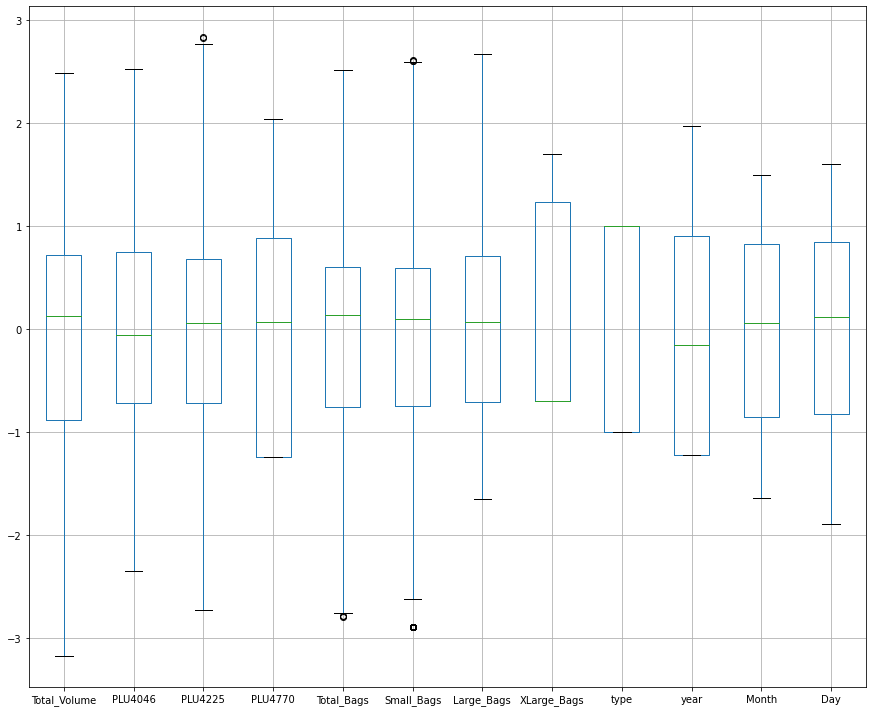

In [36]:
x.iloc[:,:].boxplot(figsize = (15,15))
plt.subplots_adjust(bottom = 0.25)
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(x)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,52.907370,Total_Volume
1,6.747984,PLU4046
2,10.915299,PLU4225
3,4.132804,PLU4770
4,34.207561,Total_Bags
5,14.610895,Small_Bags
6,3.346913,Large_Bags
7,2.113570,XLarge_Bags
8,3.679994,type
9,1.399312,year


In [39]:
x = x.drop(['Total_Volume'], axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(x)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,3.668554,PLU4046
1,4.368622,PLU4225
2,4.112840,PLU4770
3,22.175695,Total_Bags
4,14.601575,Small_Bags
5,3.278055,Large_Bags
6,2.097680,XLarge_Bags
7,3.429587,type
8,1.394132,year
9,1.058181,Month


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [43]:
 max_r2_score = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    r2_score = reg.score(x_test,y_test)
    print('r2_score', r2_score*100,'%', 'random_state', i)
    
    if r2_score > max_r2_score:
        max_r2_score = r2_score
        maxRS = i
        print('r2_score', max_r2_score*100,'%', 'random_state', i)   

r2_score 56.14990233402437 % random_state 1
r2_score 56.14990233402437 % random_state 1
r2_score 53.611970954358654 % random_state 2
r2_score 54.996663523756425 % random_state 3
r2_score 55.51680797176248 % random_state 4
r2_score 54.544856303002746 % random_state 5
r2_score 56.323448194777484 % random_state 6
r2_score 56.323448194777484 % random_state 6
r2_score 56.279394193704114 % random_state 7
r2_score 56.016783422951455 % random_state 8
r2_score 53.79894597519692 % random_state 9
r2_score 56.169103541592705 % random_state 10
r2_score 55.28163781971863 % random_state 11
r2_score 55.144810893160944 % random_state 12
r2_score 55.237573135723295 % random_state 13
r2_score 56.19269764174186 % random_state 14
r2_score 55.85384797078638 % random_state 15
r2_score 55.09739020687315 % random_state 16
r2_score 55.53951815914894 % random_state 17
r2_score 56.55828219667826 % random_state 18
r2_score 56.55828219667826 % random_state 18
r2_score 56.12147586855969 % random_state 19
r2_score 56

r2_score 55.5815418449088 % random_state 176
r2_score 56.888683782685035 % random_state 177
r2_score 54.49983229677227 % random_state 178
r2_score 57.93729166713626 % random_state 179
r2_score 55.67708268237208 % random_state 180
r2_score 56.54801610141536 % random_state 181
r2_score 56.559865221517036 % random_state 182
r2_score 55.375048772749416 % random_state 183
r2_score 56.958129016638196 % random_state 184
r2_score 55.899457590219995 % random_state 185
r2_score 56.39427013325742 % random_state 186
r2_score 55.03077929083049 % random_state 187
r2_score 56.48409824206138 % random_state 188
r2_score 56.46162196443214 % random_state 189
r2_score 56.69866481151804 % random_state 190
r2_score 55.65701592870522 % random_state 191
r2_score 55.28726126059331 % random_state 192
r2_score 55.74300244803745 % random_state 193
r2_score 56.439411884495314 % random_state 194
r2_score 54.98811672003712 % random_state 195
r2_score 56.602848508550885 % random_state 196
r2_score 55.38758368107926 %

In [44]:
print('best accuracy',max_r2_score,'best random state',maxRS)

best accuracy 0.5812377103574944 best random state 75


In [45]:
from sklearn.model_selection import cross_val_score


In [46]:
lif=LinearRegression()
lif.fit(x_train,y_train)

LinearRegression()

In [47]:
lif.score(x_train,y_train)

0.5556913848790417

In [48]:
lif.fit(x_test,y_test)

LinearRegression()

In [49]:
lif.score(x_test,y_test)

0.5675068873922816

In [50]:
y_pred=lif.predict(x_test)

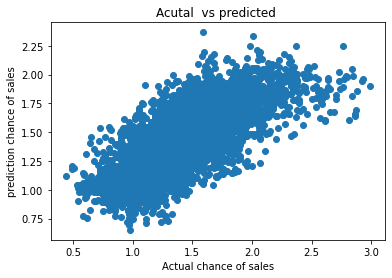

In [51]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of sales')
plt.ylabel('prediction chance of sales')
plt.title('Acutal  vs predicted ')
plt.show()

In [52]:
# HyperParameter Tuning
param_grid = {'copy_X': [True,False],
              'fit_intercept': [True,False],
              'normalize': [True,False]}

grd = GridSearchCV(lif, param_grid = param_grid)
grd.fit(x_train, y_train)

print("Best parameters: ", grd.best_params_)

lif = grd.best_estimator_

lif.fit(x_train, y_train)

y_pred = lif.predict(x_test)

print('R2 Score: ', lif.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best parameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': True}
R2 Score:  0.5654120343674103
Mean Squared Error:  0.07163660753379253


In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

In [54]:
data=pd.read_csv("avocado.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [55]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [66]:
x_c = data.drop(columns = ['region'])
y_c = data[['region']]

print(x_c.shape)
print(y_c.shape)

(18249, 15)
(18249, 1)


In [67]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

elements = data.select_dtypes(include=['object']).columns

elements

Index([], dtype='object')

In [68]:
for i in elements:
    data[i] = enc.fit_transform(data[i])

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  int32         
 12  year          18249 non-null  int64         
 13  region        18249 non-null  int32         
 14  Month         18249 non-null  int64         
 15  Day           18249 non-null  int64 

In [70]:
x_c=x_c.drop('Date',axis=1)
x_c

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,28
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,21
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,14


In [71]:
scaler = StandardScaler()
xc_scaled = scaler.fit_transform(x_c)

In [72]:
x_train,x_test,y_train,y_test=train_test_split(xc_scaled,y_c,test_size=.25,random_state=49)
y_train.head()

,region
10756,31
1027,19
13736,34
2638,50
2597,49


In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve


In [74]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.12469866316020162
[[ 4  4  6 ...  0  0  0]
 [ 4  3  4 ...  0  0  0]
 [ 7  2  7 ...  0  0  0]
 ...
 [ 0  0  4 ... 62  0  0]
 [ 2  3  2 ...  0 35  0]
 [ 4 17  4 ...  0  0  5]]
              precision    recall  f1-score   support

           0       0.01      0.05      0.02        87
           1       0.01      0.04      0.01        73
           2       0.02      0.10      0.04        72
           3       0.01      0.03      0.01        77
           4       0.00      0.01      0.01        76
           5       0.03      0.06      0.04        96
           6       0.23      0.37      0.29        83
           7       0.01      0.01      0.01        90
           8       0.20      0.27      0.23        86
           9       0.02      0.04      0.02        81
          10       0.00      0.01      0.01        76
          11       0.12      0.18      0.15        89
          12       0.14      0.19      0.16        70
          13       0.13      0.16      0.14        

In [75]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7959675651983344
[[72  0  0 ...  0  0  0]
 [ 0 47  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  2]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  1 69  0]
 [ 0  2  2 ...  0  0 58]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        87
           1       0.59      0.64      0.61        73
           2       0.87      0.90      0.88        72
           3       0.92      0.84      0.88        77
           4       0.89      0.82      0.85        76
           5       0.88      0.69      0.77        96
           6       0.96      0.92      0.94        83
           7       0.85      0.81      0.83        90
           8       0.90      0.93      0.91        86
           9       0.77      0.78      0.77        81
          10       0.70      0.68      0.69        76
          11       0.91      0.83      0.87        89
          12       0.82      0.89      0.85        70
          13       0.70      0.70      0.70        8

In [76]:
from sklearn.model_selection import cross_val_score

acc = accuracy_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(reg, x_c, y_c, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy Score is : ", acc)

At CV: 2
Cross Validation Score is:  -614100.4353140336
Accuracy Score is :  0.7959675651983344
At CV: 3
Cross Validation Score is:  -712.7704109522134
Accuracy Score is :  0.7959675651983344
At CV: 4
Cross Validation Score is:  -873.544674466482
Accuracy Score is :  0.7959675651983344
At CV: 5
Cross Validation Score is:  -555.9335283540937
Accuracy Score is :  0.7959675651983344
At CV: 6
Cross Validation Score is:  -12.126750329968695
Accuracy Score is :  0.7959675651983344
At CV: 7
Cross Validation Score is:  -26.280605634974947
Accuracy Score is :  0.7959675651983344
At CV: 8
Cross Validation Score is:  -47.90588198699089
Accuracy Score is :  0.7959675651983344
At CV: 9
Cross Validation Score is:  -46.23659378691511
Accuracy Score is :  0.7959675651983344


In [77]:
from sklearn.model_selection import cross_val_score

acc = accuracy_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(reg,x_c, y_c, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy Score is : ", acc)

At CV: 2
Cross Validation Score is:  -614100.4353140336
Accuracy Score is :  0.7959675651983344
At CV: 3
Cross Validation Score is:  -712.7704109522134
Accuracy Score is :  0.7959675651983344
At CV: 4
Cross Validation Score is:  -873.544674466482
Accuracy Score is :  0.7959675651983344
At CV: 5
Cross Validation Score is:  -555.9335283540937
Accuracy Score is :  0.7959675651983344
At CV: 6
Cross Validation Score is:  -12.126750329968695
Accuracy Score is :  0.7959675651983344
At CV: 7
Cross Validation Score is:  -26.280605634974947
Accuracy Score is :  0.7959675651983344
At CV: 8
Cross Validation Score is:  -47.90588198699089
Accuracy Score is :  0.7959675651983344
At CV: 9
Cross Validation Score is:  -46.23659378691511
Accuracy Score is :  0.7959675651983344


In [82]:
# Saving the Model

import joblib
joblib.dump(knn, "Avocado_Project.pkl")

['Avocado_Project.pkl']